In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #데이터 구조, 행열 크기 알아보기

(66281, 4)

In [149]:
#22년1월1일 데이터만 추출해서, 가시화를 해보자
data220101 = act.copy()
data220101 = act[ (act['timestamp'] >= '2022-01-01 00:00:00.000')  & (act['timestamp'] < '2022-01-02 00:00:00.000') ]


data220101 = data220101.copy()
data220101['p_timestamp'] = data220101['timestamp'].shift(1)
data220101['p_x'] = data220101['X'].shift(1)
data220101['p_y'] = data220101['Y'].shift(1)
data220101['p_z'] = data220101['Z'].shift(1)


#22년1월2일 데이터만 추출해서, 가시화를 해보자
data220102 = act.copy()
data220102 = act[ (act['timestamp'] >= '2022-01-02 00:00:00.000')  & (act['timestamp'] < '2022-01-03 00:00:00.000') ]


data220102 = data220102.copy()
data220102['p_timestamp'] = data220102['timestamp'].shift(1)
data220102['p_x'] = data220102['X'].shift(1)
data220102['p_y'] = data220102['Y'].shift(1)
data220102['p_z'] = data220102['Z'].shift(1)

#22년1월3일 데이터만 추출해서, 가시화를 해보자
data220103 = act.copy()
data220103 = act[ (act['timestamp'] >= '2022-01-03 00:00:00.000')  & (act['timestamp'] < '2022-01-04 00:00:00.000') ]

data220103 = data220103.copy()
data220103['p_timestamp'] = data220103['timestamp'].shift(1)
data220103['p_x'] = data220103['X'].shift(1)
data220103['p_y'] = data220103['Y'].shift(1)
data220103['p_z'] = data220103['Z'].shift(1)

#22년1월4일 데이터만 추출해서, 가시화를 해보자
data220104 = act.copy()
data220104 = act[ (act['timestamp'] >= '2022-01-04 00:00:00.000')  & (act['timestamp'] < '2022-01-05 00:00:00.000') ]

data220104 = data220104.copy()
data220104['p_timestamp'] = data220104['timestamp'].shift(1)
data220104['p_x'] = data220104['X'].shift(1)
data220104['p_y'] = data220104['Y'].shift(1)
data220104['p_z'] = data220104['Z'].shift(1)


In [150]:
# NaN 값이 있는 행을 삭제하자. NaN가 있으면 거리 및 속도 계산할 수 없다.
# 첫번째 행이 삭제될 것이다.
cleaned1 = data220101.dropna()
cleaned2 = data220102.dropna()
cleaned3 = data220103.dropna()
cleaned4 = data220104.dropna()

In [151]:
#unixtime과 시간(hh:mm) 열 만들기
import time
from datetime import datetime


# 10분단위별 활동지수
def make_hour_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 600)

# 10분 단위 문자열 만들기
def hour_min(df):
    d = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    newt1 = int(time.mktime(d.timetuple()) // 600) * 600
    newt2 = datetime.fromtimestamp(newt1)
    return "{:02d}:{:02d}".format(newt2.hour, newt2.minute)
    
tenmin1 = cleaned1.copy()
tenmin1['utime'] =tenmin1[["timestamp"]].apply(make_hour_unixtime, axis=1)
tenmin1['hm'] =tenmin1[["timestamp"]].apply(hour_min, axis=1)

tenmin2 = cleaned2.copy()
tenmin2['utime'] =tenmin2[["timestamp"]].apply(make_hour_unixtime, axis=1)
tenmin2['hm'] =tenmin2[["timestamp"]].apply(hour_min, axis=1)

tenmin3 = cleaned3.copy()
tenmin3['utime'] =tenmin3[["timestamp"]].apply(make_hour_unixtime, axis=1)
tenmin3['hm'] =tenmin3[["timestamp"]].apply(hour_min, axis=1)

tenmin4 = cleaned4.copy()
tenmin4['utime'] =tenmin4[["timestamp"]].apply(make_hour_unixtime, axis=1)
tenmin4['hm'] =tenmin4[["timestamp"]].apply(hour_min, axis=1)

In [152]:
from datetime import datetime
import time

# 거리 계산
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['Z'] - df['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)
   
# 시간 차분 단위: sec
def calc_timediff(df):
    d1 = datetime.strptime(str(df['timestamp']), "%Y-%m-%d %H:%M:%S.%f")
    d2 = datetime.strptime(str(df['p_timestamp']), "%Y-%m-%d %H:%M:%S.%f")
    return (d1 - d2).total_seconds()

# 속도를 구함
def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        # 정상적인 수가 아님.
        return 0  

def hour_min(df):
    newt1 = df['utime'] * 600
    newt2 = datetime.fromtimestamp(newt1)
    return "{:02d}:{:02d}".format(newt2.hour, newt2.minute)

In [160]:
#마찬가지로 거리, 시간차분, 속도를 구한다.

#22-01-01 데이터    
tenmin1['dist'] = tenmin1[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(calc_dist, axis=1)
tenmin1['d_time'] = tenmin1[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
tenmin1['calc_act'] = tenmin1[["dist", "d_time"]].apply(calc_act, axis=1)


# unxtime으로 그룹핑하기
grouped1 = tenmin1.groupby(['utime'])
grouped_calc_act1 = grouped1['calc_act']
result1 = grouped_calc_act1.agg(['mean'])


newtenmin1 = pd.DataFrame(np.empty((144,3)), columns=['utime','mean','hm'])

newtenmin1[:] = np.nan

newtenmin1['utime'] = np.arange(2734938,2735082,1)
newtenmin1['hm'] = newtenmin1[["utime"]].apply(hour_min, axis=1)

newData1 = pd.merge(newtenmin1, result1[ result1['mean'] > 0], on="utime", how="left")


# mean_x가 결측치면 mean_y값을 new_mean로 대입하라
newData1['new_mean'] = newData1['mean_x'].fillna(newData1['mean_y'])


# NaN값을 zero로 채우기
newData1 = newData1.fillna(0)
newData1


,utime,mean_x,hm,mean_y,new_mean
0,2734938,0.0,00:00,2.359774,2.359774
1,2734939,0.0,00:10,3.804910,3.804910
2,2734940,0.0,00:20,1.204413,1.204413
3,2734941,0.0,00:30,0.065608,0.065608
4,2734942,0.0,00:40,0.000000,0.000000
...,...,...,...,...,...
139,2735077,0.0,23:10,4.610322,4.610322
140,2735078,0.0,23:20,1.577668,1.577668
141,2735079,0.0,23:30,7.753006,7.753006
142,2735080,0.0,23:40,7.176995,7.176995


In [155]:
#마찬가지로 거리, 시간차분, 속도를 구한다.

#22-01-02 데이터
tenmin2['dist'] = tenmin2[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(calc_dist, axis=1)
tenmin2['d_time'] = tenmin2[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
tenmin2['calc_act'] = tenmin2[["dist", "d_time"]].apply(calc_act, axis=1)


# unxtime으로 그룹핑하기
grouped2 = tenmin2.groupby(['utime'])
grouped_calc_act2 = grouped2['calc_act']
result2 = grouped_calc_act2.agg(['mean'])


newtenmin2 = pd.DataFrame(np.empty((144,3)),
            columns=['utime','mean','hm'])


newtenmin2[:] = np.nan

newtenmin2['utime'] = np.arange(2735082,2735226,1)
newtenmin2['hm'] = newtenmin2[["utime"]].apply(hour_min, axis=1)

newData2 = pd.merge(newtenmin2, result2[ result2['mean'] > 0], on="utime", how="left")

# mean_x가 결측치면 mean_y값을 new_mean로 대입하라
newData2['new_mean'] = newData2['mean_x'].fillna(newData2['mean_y'])


# NaN값을 zero로 채우기
newData2 = newData2.fillna(0)
newData2



,utime,mean_x,hm,mean_y,new_mean
0,2735082,0.0,00:00,0.000000,0.000000
1,2735083,0.0,00:10,0.000000,0.000000
2,2735084,0.0,00:20,0.000000,0.000000
3,2735085,0.0,00:30,0.000000,0.000000
4,2735086,0.0,00:40,6.239967,6.239967
...,...,...,...,...,...
139,2735221,0.0,23:10,2.783077,2.783077
140,2735222,0.0,23:20,1.682376,1.682376
141,2735223,0.0,23:30,1.854513,1.854513
142,2735224,0.0,23:40,2.240386,2.240386


In [156]:
#마찬가지로 거리, 시간차분, 속도를 구한다.

#22-01-03 데이터
tenmin3['dist'] = tenmin3[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(calc_dist, axis=1)
tenmin3['d_time'] = tenmin3[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
tenmin3['calc_act'] = tenmin3[["dist", "d_time"]].apply(calc_act, axis=1)


# unxtime으로 그룹핑하기
grouped3 = tenmin3.groupby(['utime'])
grouped_calc_act3 = grouped3['calc_act']
result3 = grouped_calc_act3.agg(['mean'])


newtenmin3 = pd.DataFrame(np.empty((144,3)), columns=['utime','mean','hm'])

newtenmin3[:] = np.nan

newtenmin3['utime'] = np.arange(2735226,2735370,1)
newtenmin3['hm'] = newtenmin2[["utime"]].apply(hour_min, axis=1)

newData3 = pd.merge(newtenmin3, result3[ result3['mean'] > 0], on="utime", how="left")

# mean_x가 결측치면 mean_y값을 new_mean로 대입하라
newData3['new_mean'] = newData3['mean_x'].fillna(newData3['mean_y'])


# NaN값을 zero로 채우기
newData3 = newData3.fillna(0)
newData3


,utime,mean_x,hm,mean_y,new_mean
0,2735226,0.0,00:00,1.835483,1.835483
1,2735227,0.0,00:10,4.129537,4.129537
2,2735228,0.0,00:20,3.647184,3.647184
3,2735229,0.0,00:30,1.952913,1.952913
4,2735230,0.0,00:40,5.130270,5.130270
...,...,...,...,...,...
139,2735365,0.0,23:10,1.698345,1.698345
140,2735366,0.0,23:20,0.000000,0.000000
141,2735367,0.0,23:30,0.000000,0.000000
142,2735368,0.0,23:40,0.000000,0.000000


In [163]:
#마찬가지로 거리, 시간차분, 속도를 구한다.

#22-01-04 데이터
tenmin4['dist'] = tenmin4[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(calc_dist, axis=1)
tenmin4['d_time'] = tenmin4[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
tenmin4['calc_act'] = tenmin4[["dist", "d_time"]].apply(calc_act, axis=1)


# unxtime으로 그룹핑하기
grouped4 = tenmin4.groupby(['utime'])
grouped_calc_act4 = grouped4['calc_act']
result4 = grouped_calc_act4.agg(['mean'])

newtenmin4 = pd.DataFrame(np.empty((144,3)), columns=['utime','hm','mean'])

newtenmin4[:] = np.nan

newtenmin4['utime'] = np.arange(2735370,2735514,1)
newtenmin4['hm'] = newtenmin4[["utime"]].apply(hour_min, axis=1)

newData4 = pd.merge(newtenmin4, result4[ result4['mean'] > 0], on="utime", how="left")

# mean_x가 결측치면 mean_y값을 new_mean로 대입하라
newData4['new_mean'] = newData4['mean_x'].fillna(newData4['mean_y'])


# NaN값을 zero로 채우기
newData4 = newData4.fillna(0)
newData4


,utime,hm,mean_x,mean_y,new_mean
0,2735370,00:00,0.0,4.638144,4.638144
1,2735371,00:10,0.0,1.073719,1.073719
2,2735372,00:20,0.0,5.461621,5.461621
3,2735373,00:30,0.0,2.143472,2.143472
4,2735374,00:40,0.0,5.831731,5.831731
...,...,...,...,...,...
139,2735509,23:10,0.0,0.189578,0.189578
140,2735510,23:20,0.0,0.888115,0.888115
141,2735511,23:30,0.0,0.554623,0.554623
142,2735512,23:40,0.0,0.347553,0.347553


In [158]:
# #인덱스 utime을 열로 변환
# result1 = result1.reset_index()
# result2 = result2.reset_index()
# result3 = result3.reset_index()
# result4 = result4.reset_index()
# result1.head(5)

,utime,mean
0,2734938,2.359774
1,2734939,3.804910
2,2734940,1.204413
3,2734941,0.065608
4,2734943,6.089196


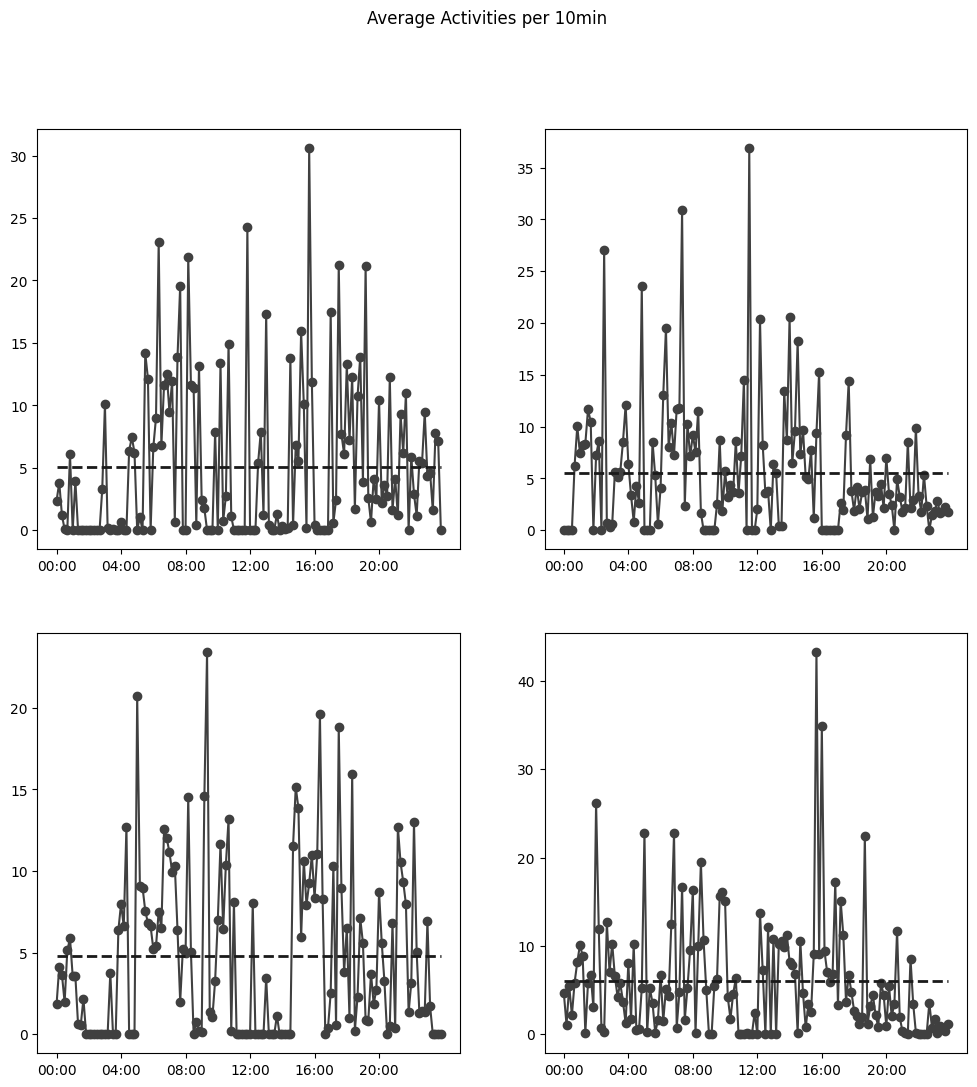

In [164]:
# 22.01.01 ~ 22.01.04 데이터를 4개 그래프로 동시에 그리기
plt.rcParams['figure.figsize'] = [12, 12]

# 2행, 2열 총 4개의 하위그래프를 생성한다.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Average Activities per 10min')

ax1.plot( newData1['hm'], newData1['new_mean'], c='0.25', marker='o')
ax1.set_xticks(ax1.get_xticks()[::24], fontsize='8')
ax1.hlines(newData1['new_mean'].mean(), newData1['hm'].min(), newData1['hm'].max(), color='0.1', linestyle='--', linewidth=2)


ax2.plot( newData2['hm'], newData2['new_mean'], c='0.25', marker='o')
ax2.set_xticks(ax2.get_xticks()[::24], fontsize='8')
ax2.hlines(newData2['new_mean'].mean(), newData2['hm'].min(), newData2['hm'].max(), color='0.1', linestyle='--', linewidth=2)

ax3.plot( newData3['hm'], newData3['new_mean'], c='0.25', marker='o')
ax3.set_xticks(ax3.get_xticks()[::24], fontsize='8')
ax3.hlines(newData3['new_mean'].mean(), newData3['hm'].min(), newData3['hm'].max(), color='0.1', linestyle='--', linewidth=2)

ax4.plot( newData4['hm'], newData4['new_mean'], c='0.25', marker='o')
ax4.set_xticks(ax4.get_xticks()[::24], fontsize='8')
ax4.hlines(newData4['new_mean'].mean(), newData4['hm'].min(), newData4['hm'].max(), color='0.1', linestyle='--', linewidth=2)

plt.show()